In [1]:
import mne 
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def ica_auto_reject(channel_names, raw_eeg_data, sfreq=500):
    # Create MNE RawArray object
    montage = mne.channels.make_standard_montage('standard_1020')
    # Set the montage in the info structure
    info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types=['eeg'] * len(channel_names))
    info.set_montage(montage)
    raw = mne.io.RawArray(raw_eeg_data, info)
    raw.plot(title='Raw EEG signal', start=0, duration=50, scalings='auto')

    # Filter EEG signals (example: band-pass filtering between 1Hz and 40Hz)
    raw.filter(l_freq=7, h_freq=40)
    raw.plot(title='Raw EEG signal', start=0, duration=10, scalings='auto')

    # Initialize and fit ICA
    ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
    ica.fit(raw)
    ica.plot_properties(raw)

    # Apply ICA denoising to the raw data
    raw_cleaned = ica.apply(raw)
    ica.plot_components(inst=raw, title='ICA components - EOG', show=True)

    raw_cleaned.plot(title='ICA applied to raw EEG signal', start=0, duration=10, scalings='auto')

    return raw_cleaned


In [3]:
def prep_data(fname):
    """ read and prepare training data """
    # Read data
    data = pd.read_csv(fname)
    # read event file
    clean=data.drop(['id' ], axis=1)#remove id
    return  clean

In [4]:
x = prep_data('C:\\Users\EGYPT\\Desktop\BCI\\test\\subj1_series9_data.csv')

In [5]:
channel_names = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
       'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10',
       'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10']

Creating RawArray with float64 data, n_channels=32, n_times=115953
    Range : 0 ... 115952 =      0.000 ...   231.904 secs
Ready.


Using matplotlib as 2D backend.


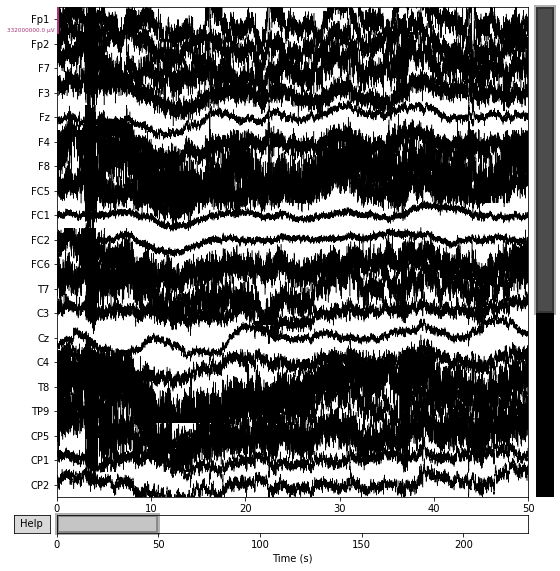

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished


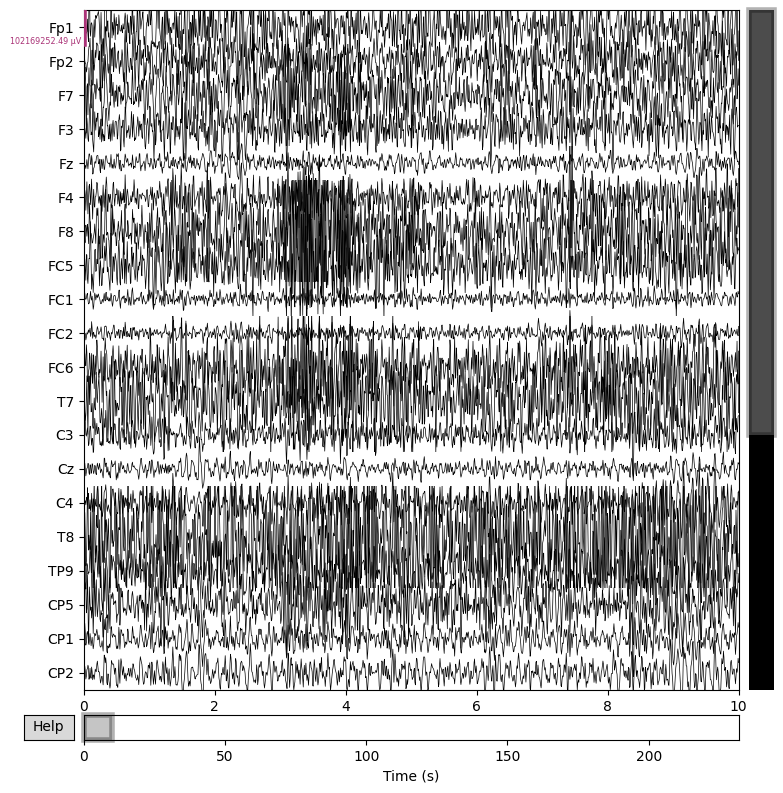

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 1.2s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated


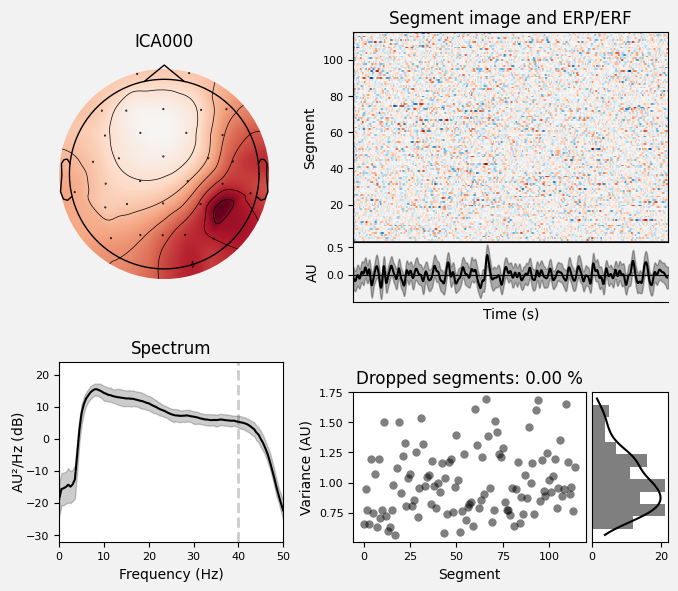

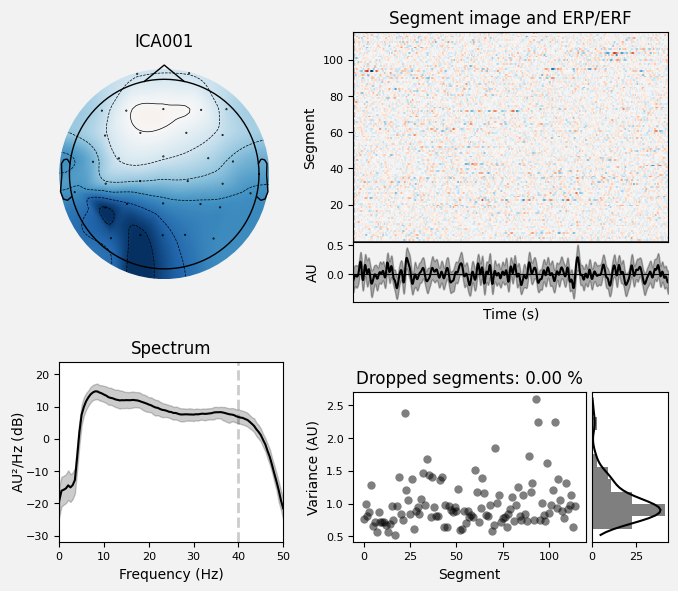

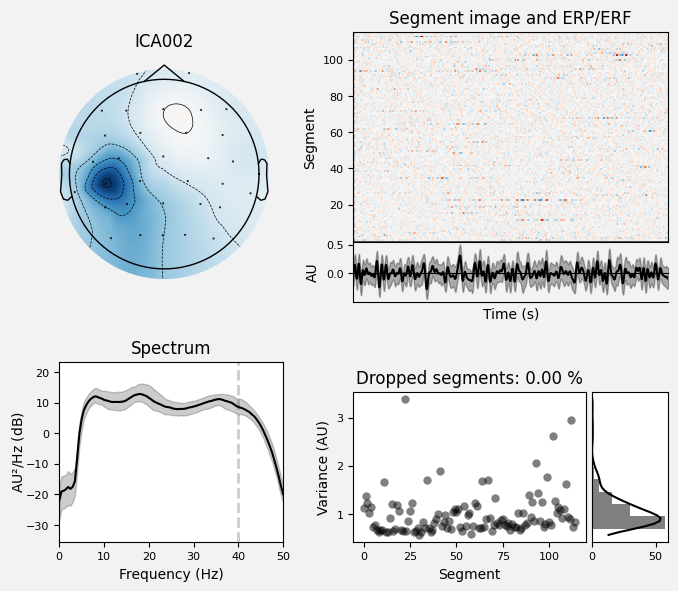

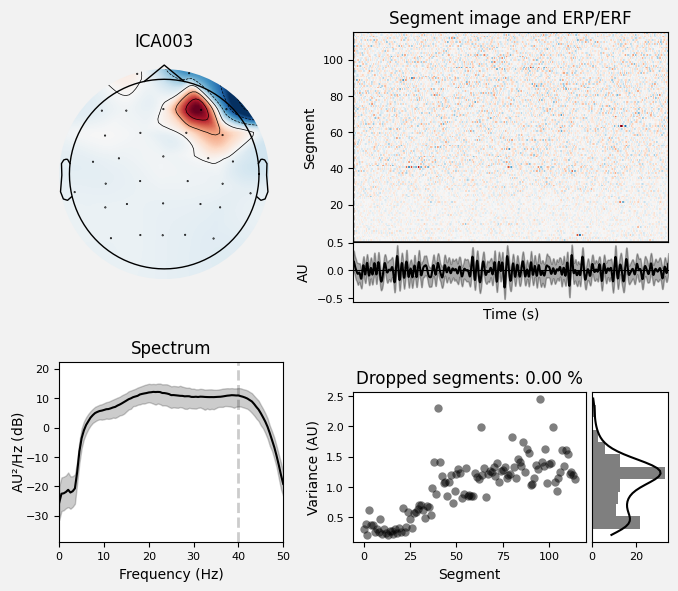

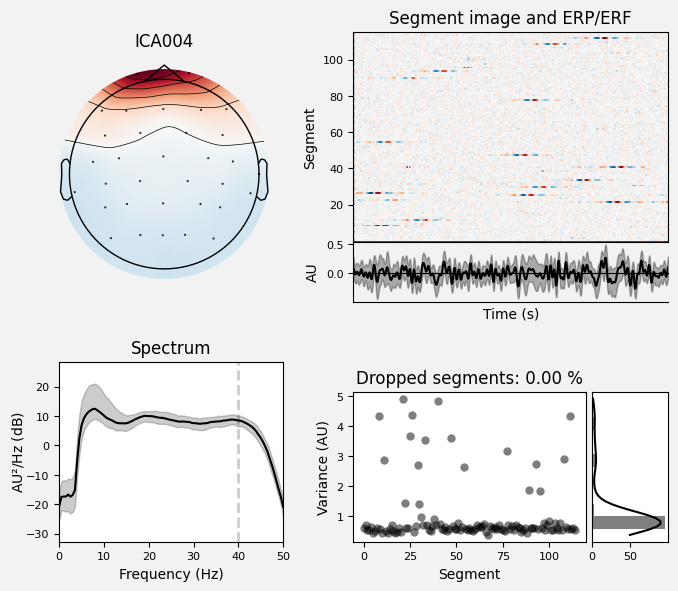

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


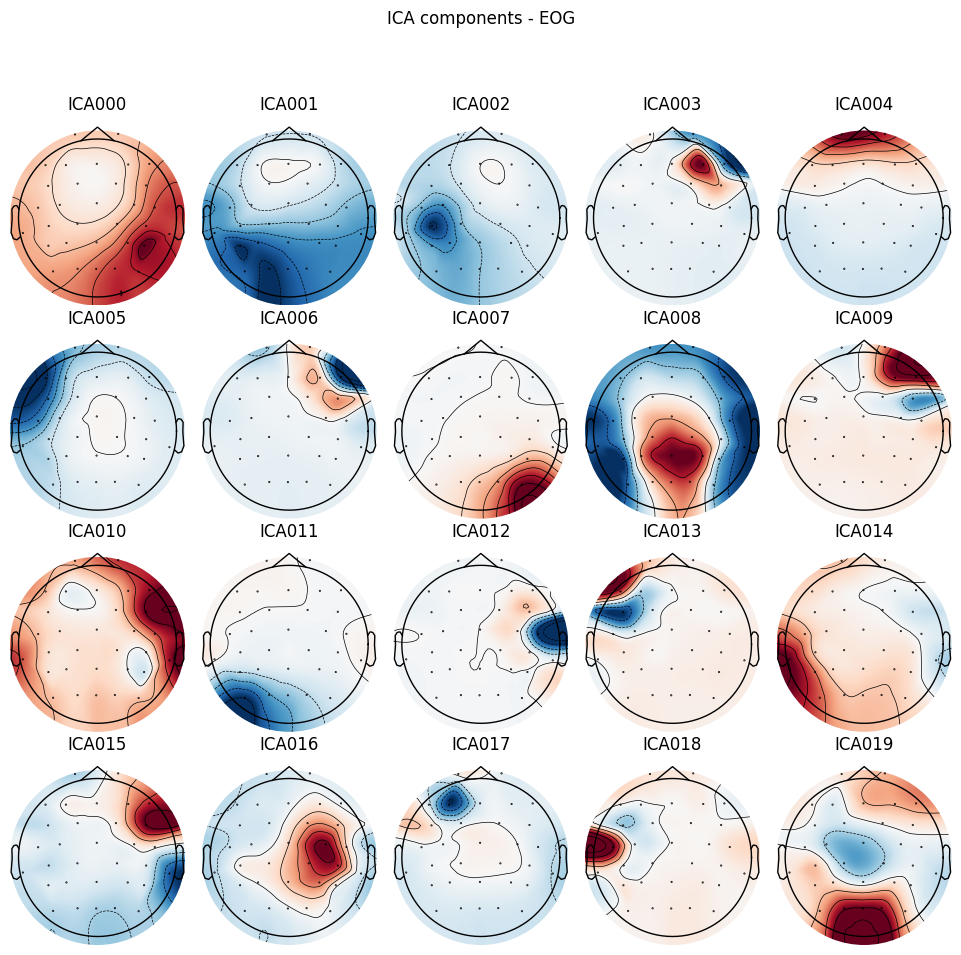

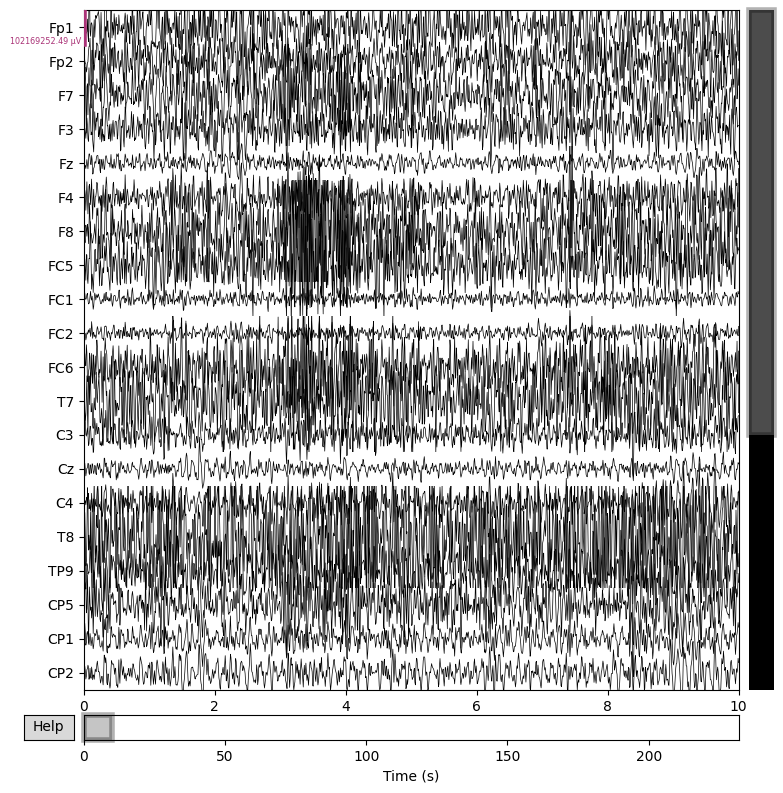

In [6]:
rslt = ica_auto_reject(channel_names, np.asarray(x.T), 500)

In [11]:
# Extract the data as a NumPy array
cleaned_data = rslt.get_data()
cleaned_data

array([[-1.30713070e-17,  9.02582962e+00,  1.71569122e+01, ...,
         4.15455766e+00,  3.48846000e-01, -4.26457928e-14],
       [-4.26353358e-14,  9.05780808e+00,  1.63893204e+01, ...,
         4.46716882e+01,  2.47321378e+01, -4.79645076e-14],
       [-2.13055769e-14,  4.48893969e+00,  8.26270151e+00, ...,
         1.07246873e+01,  4.54784344e+00, -4.88396316e-14],
       ...,
       [ 3.55297732e-14,  7.38220608e+00,  1.33888840e+01, ...,
         3.14955062e+00,  1.14065564e+00, -2.57547231e-14],
       [ 3.55268322e-14,  3.27628215e+00,  5.90199596e+00, ...,
         1.81616194e+01,  9.09037196e+00, -1.95406237e-14],
       [ 1.42104715e-14, -3.06330930e+00, -6.41976005e+00, ...,
         6.03007534e+01,  3.09768405e+01, -3.55271590e-14]])

In [82]:
def prepare_plot(unfiltered, filtered):
    # unfiltered is a pandas dataframe , filtered is a numpy array
    # returns a dict of tuples of numpy arrays
    results = {}
    col_names = ['Fp1', 'Fp2', 'F7', 'F8']
    idxs = [0,1,2,6]
    for col, idx in zip(col_names, idxs):
        results[col] = (unfiltered.iloc[:, idx].to_numpy(), filtered[idx])
    return results

    
m = prepare_plot(x, cleaned_data)


{'Fp1': (array([ 66,  85, 122, ..., 288, 279, 293], dtype=int64),
  array([-1.30713070e-17,  9.02582962e+00,  1.71569122e+01, ...,
          4.15455766e+00,  3.48846000e-01, -4.26457928e-14])),
 'Fp2': (array([213, 178, 209, ..., 152, 178, 213], dtype=int64),
  array([-4.26353358e-14,  9.05780808e+00,  1.63893204e+01, ...,
          4.46716882e+01,  2.47321378e+01, -4.79645076e-14])),
 'F7': (array([347, 297, 275, ..., 445, 460, 466], dtype=int64),
  array([-2.13055769e-14,  4.48893969e+00,  8.26270151e+00, ...,
          1.07246873e+01,  4.54784344e+00, -4.88396316e-14])),
 'F8': (array([244, 237, 245, ..., 408, 141,  85], dtype=int64),
  array([-1.42111250e-14,  8.37661566e+00,  1.42682825e+01, ...,
          6.34087675e+01,  3.22729392e+01,  7.10556251e-15]))}

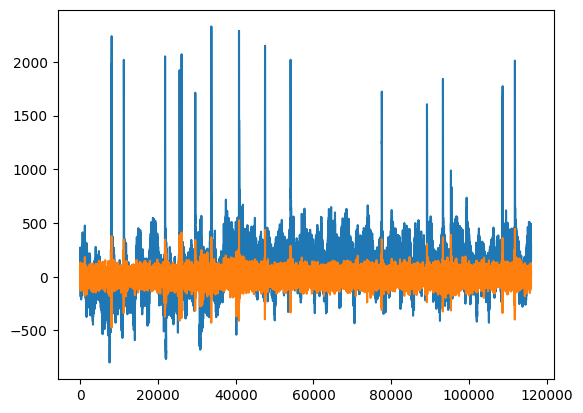

In [84]:
plt.plot(m["Fp1"][0])
plt.plot(m["Fp1"][1])